In [2]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

In [30]:
def generate_distance_matrix(dim, filename=None):
    distance_matrix = np.random.rand(dim, dim)
    np.fill_diagonal(distance_matrix, 0)
    
    distance_matrix = np.tril(distance_matrix) + np.tril(distance_matrix, -1).T

    if filename:
        np.savetxt(filename, distance_matrix)

    return distance_matrix

def fitness_function(solutions, distance_matrix):
    def pair_distance(i, j):
        return distance_matrix[i, j]

    pair_distance_func = np.vectorize(pair_distance)

    print(solutions)
    print(np.repeat(solutions, 2, axis=1)[:, 1:-1])

    distance = np.sum(pair_distance_func(np.repeat(solutions, 2, axis=1)[1:-1], 2))

    return distance

In [31]:
N = 5
distance_matrix = generate_distance_matrix(N)
solutions = np.array([np.random.permutation(N), np.random.permutation(N)])

fitness_function(solutions, distance_matrix)

[[2 4 3 0 1]
 [1 4 2 0 3]]
[[2 4 4 3 3 0 0 1]
 [1 4 4 2 2 0 0 3]]


ValueError: cannot call `vectorize` on size 0 inputs unless `otypes` is set

 The best solution found:                                                                           
 [0.00771932 0.00111927 0.01404607 0.02175238 0.00072467 0.00740299
 0.00157694 0.02269269 0.00608871 0.00305286]

 Objective function:
 0.0861759073127967


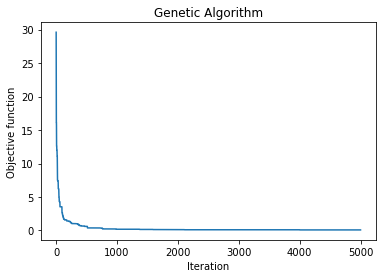

In [5]:
def f(X):
    return np.sum(X)

N = 10

varbound=np.array([[0,10]]*N)
model=ga(function=f, dimension=N, variable_type='real', variable_boundaries=varbound)

model.run()